# ecdfplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Что такое ECDF?

**Эмпирическая функция распределения ECDF** (Empirical Cumulative Distribution Function) - это функция, которая показывает долю данных, меньших или равных определенному значению. В отличие от гистограммы, которая разбивает данные на интервалы (бины) и отображает количество наблюдений в каждом интервале, ECDF строит кумулятивное распределение данных. Это значит, что ECDF предоставляет накопленную частоту данных.

"Эмпирическая" означает, что функция основана на наблюдаемых данных, а не на теоретическом распределении.

**Как строится ECDF?**
1. Сначала сортируются все значения в наборе данных.
2. Для каждого значения в отсортированном наборе данных рассчитывается доля данных, которая меньше или равна этому значению.
3. На оси X откладываются значения данных, а на оси Y - кумулятивная частота для каждого значения.

**Пример:**

Представим, что у нас есть небольшой набор данных: 3, 1, 4, 1, 5, 9, 2, 6, 5.1. 

Сортируем данные: 1, 1, 2, 3, 4, 5, 5, 6, 2. 9.
Рассчитываем кумулятивную часто- ту:
Значение 1: 2/9 (так как 2 из 9 значений равны-  1).
Значение 2: 3/9 (так как 3 из 9 значений меньше или равн- ы 2).
Значение 3: 4/9 (и так дале.      3. Строим график.

**Пример:**

Представим, что у нас есть небольшой набор данных: 3, 1, 4, 1, 5, 9, 2, 6, 5.

1. Сортируем данные: 1, 1, 2, 3, 4, 5, 5, 6, 9.
2. Рассчитываем кумулятивную частоту:
    - Значение 1: 2/9 (так как 2 из 9 значений равны 1).
    - Значение 2: 3/9 (так как 3 из 9 значений меньше или равны 2).
    - Значение 3: 4/9 (и так далее...).
3. Строим график.

В библиотеке **seaborn** за построение ECDF-графиков отвечает функция `sns.ecdfplot()`. Рассмотрим основные параметры функции `sns.ecdfplot()`:
- `data`: массив данных или датафрейм, содержащий данные для построения ECDF;
- `x`: имя столбца или массив значений для оси X;
- `y`: (нечасто используется) имя столбца или массив значений для оси Y. В ECDF чаще используется параметр x;
- `hue`: имя столбца или массив, задающий подгруппы данных для отображения на графике разными цветами;
- `weights`: массив весов для взвешенного ECDF;
- `stat`: тип статистики для отображения на оси Y ('proportion' (по умолчанию), 'count', 'percent')';
- `complementary`: логическое значение, указывающее, строить ли дополнительную ECDF (1 - ECDF). По умолчанию False;
- `palette`: палитра цветов для подгрупп, заданных параметром hue;
- `hue_order`: определяет порядок категорий в подгруппах;
- `log_scale`: логическое значение или пара значений, указывающих, применять ли логарифмическое масштабирование к осям. Например, log_scale=True для логарифмической шкалы на обеих осях или log_scale=(False, True) для логарифмической шкалы только на оси Y.

Для демонстрации построения диаграммы ECDF, из библиотеки *seaborn* загрузим встроенный датасет `'tips',` содержащий информацию о чаевых, которые оставляли посетители ресторана.

Загрузим датасет:

In [3]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Датафрейм содержит следующую информацию:
- `total_bill`: общая сумма счета;
- `tip`: сумма чаевых;
- `sex`: пол посетителя;
- `smoker`: курящий или нет;
- `day`: день недели;
- `time`: время посещения ресторана (обед или ужин);
- `size`: количество людей за столиком.

Для рассмотрения примеров, сделаем стиль отображения - белый с сеткой координат:

In [6]:
sns.set_style('whitegrid')

Построим ecdf-график по столбцу с чаевыми:

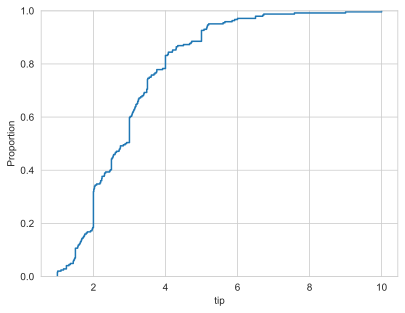

In [7]:
sns.ecdfplot(x='tip', data=tips);

По оси `X` находятся данные о размере чаевых, а по оси `Y` - кумулятивная доля этих значений (пропорция).

Посмотрев на график, можно сделать некоторые умозаключения по поводу распределения этих данных:
1. По диаграмме видно, что основная доля размера чаевых (около 60%) находится в интервале от 2 до 4 долларов.
2. Клиенты ресторана часто оставляют в виде чаевых круглые суммы - 2, 3, 4, 5, 1.50, 2.50, 3.50 долларов, о чём говорят вертикальные линии на графике.
3. Наиболее часто встречающийся размер чаевых - это 2 доллара (самая длинная вертикальная линия).
4. Максимальный размер чаевых равен 10 долларам.
5. Чаевые свыше 5 долларов составляют около 10% от общего объема, что можно посмотреть, добавив горизонтальную линию на уровне 90%:

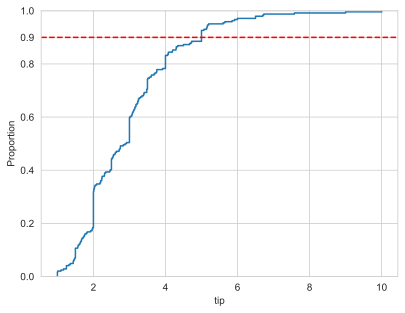

In [8]:
sns.ecdfplot(x='tip', data=tips)

plt.axhline(0.9, c='r', ls='--')

# добавим метку 0.9 на ось Y, используя функционал библиотеки matplotlib
ticks = plt.yticks()[0] 
new_ticks = list(ticks) + [0.9]
plt.yticks(new_ticks);

**Параметр hue**

Параметр `hue` в функции `sns.ecdfplot()` используется для группировки данных и построения нескольких ECDF-диаграмм для различных подгрупп в одном графике, что позволяет визуализировать распределения для разных категорий переменной и сравнивать их между собой.

Например, построим график, сгруппированный по полу клиентов:

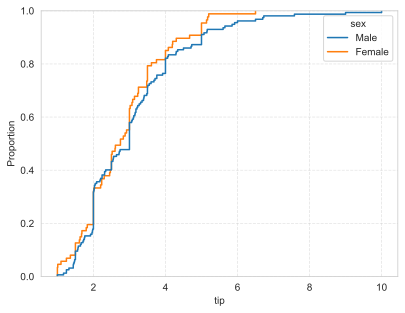

In [9]:
sns.ecdfplot(x='tip', data=tips,
             hue='sex')

plt.grid(linestyle='--', alpha=0.5);

Как видим, мужчины в этом ресторане оказались немного более щедрыми на чаевые, чем женщины.

Можем также посмотреть распределение по дням недели:

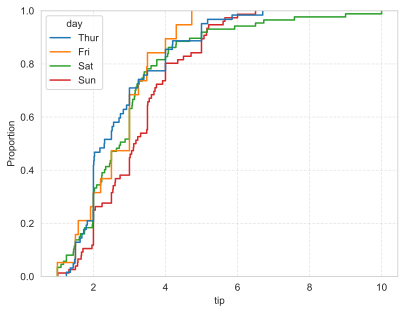

In [10]:
sns.ecdfplot(x='tip', data=tips,
             hue='day')

plt.grid(linestyle='--', alpha=0.5);

И опять мы из графика можем почерпнуть интересную информацию для анализа. Мы видим, что самые крупные по размеру чаевые оставляли преимущественно в субботу (зелёная линия), а общий уровень чаевых был выше всего в воскресенье (красная линия).

**Параметр stat**

Используя параметр `stat`, мы можем поменять отображение данных по оси ординат с долей на количество `'count'`:

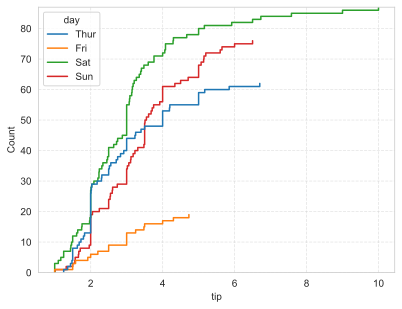

In [11]:
sns.ecdfplot(x='tip', data=tips,
             hue='day',
             stat='count')

plt.grid(linestyle='--', alpha=0.5);

Теперь по оси `Y` на графике отложено количество клиентов, заплативших чаевые. И мы можем отметить, что самое большое количество чаевых было оставлено в субботу (свыше 80-ти раз), а самое маленькое количество клиенты оставили в пятницу (менее 20-ти).

**Параметр palette**

Параметром `palette` можно изменить цветовую палитру диаграммы. Например, применим другое цветовое решение к предыдущему графику:

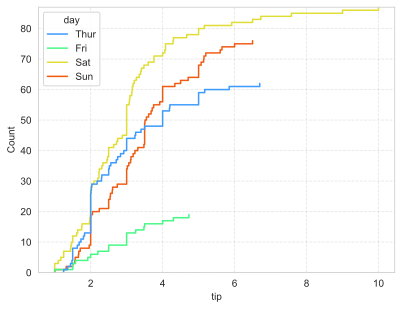

In [12]:
sns.ecdfplot(x='tip', data=tips,
             hue='day',
             stat='count',
             palette='turbo')

plt.grid(linestyle='--', alpha=0.5);

Сделаем также линии графика пошире параметром linewidth:

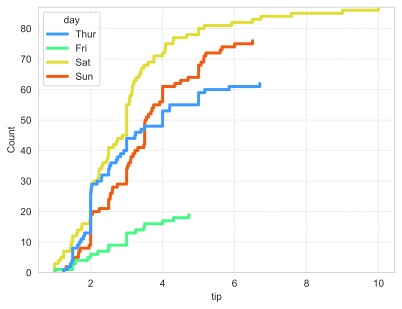

In [13]:
sns.ecdfplot(x='tip', data=tips,
             hue='day',
             stat='count',
             palette='turbo',
             linewidth=3)

plt.grid(linestyle='--', alpha=0.5);

**Легенда, наименования осей и заголовок графика**

Для работы с легендой, осями и заголовком мы будем использовать функции библиотеки *matplotlib*.

Для начала в нашем графике русифицируем легенду, что мы сделаем при помощи функции `plt.legend()`:

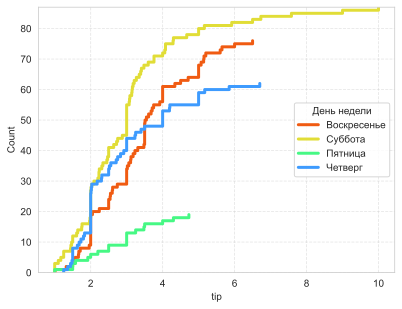

In [14]:
sns.ecdfplot(x='tip', data=tips,
             hue='day',
             palette='turbo',
             stat='count',
             linewidth=3)

plt.legend(['Воскресенье', 'Суббота', 'Пятница', 'Четверг'], 
           title='День недели',
           loc='center right')

plt.grid(linestyle='--', alpha=0.5);

В функцию `plt.legend()` мы передали список со значениями для отображения в легенде на графике. Последовательность: `'Воскресенье', 'Суббота', 'Пятница', 'Четверг'` соответствует структуре нашего датасета.

Далее параметру `title` функции `plt.legend()` передали название заголовка, который будет отображаться в легенде. А затем параметру `loc` присвоили атрибут `'center right'`, т.е. дали команду отобразить легенду справа по центру.

Теперь давайте поменяем наименования осей при помощи функций `plt.xlabel()` и `plt.ylabel()`, которым передадим новые имена осей:

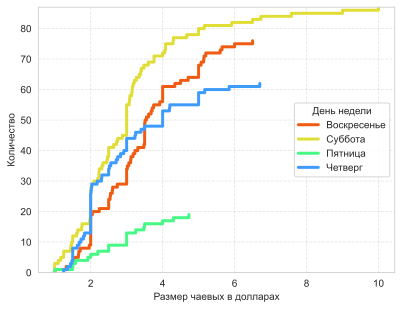

In [15]:
sns.ecdfplot(x='tip', data=tips,
             hue='day',
             palette='turbo',
             stat='count',
             linewidth=3)
plt.legend(['Воскресенье', 'Суббота', 'Пятница', 'Четверг'], 
           title='День недели',
           loc='center right')
plt.grid(linestyle='--', alpha=0.5)

plt.xlabel('Размер чаевых в долларах')
plt.ylabel('Количество');

В завершении обработки этого графика, присвоим название этой диаграмме при помощи функции `plt.title()`:

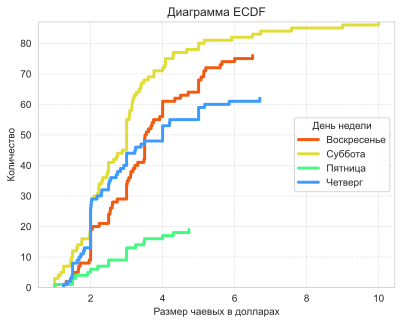

In [16]:
sns.ecdfplot(x='tip', data=tips,
             hue='day',
             palette='turbo',
             stat='count',
             linewidth=3)
plt.legend(['Воскресенье', 'Суббота', 'Пятница', 'Четверг'], 
           title='День недели',
           loc='center right')
plt.grid(linestyle='--', alpha=0.5)

plt.xlabel('Размер чаевых в долларах')
plt.ylabel('Количество')
plt.title('Диаграмма ECDF');

**Параметр complementary**

Параметр `complementary` функции `sns.ecdfplot()` управляет построением дополнительной кумулятивной функции распределения (CCDF - Complementary Cumulative Distribution Function), которая отображает вероятность того, что случайная величина будет больше заданного значения.

Построим график распределения с параметром `complementary=True`:

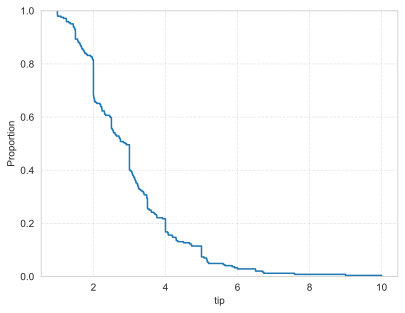

In [17]:
sns.ecdfplot(x='tip', data=tips,
             complementary=True)

plt.grid(linestyle='--', alpha=0.5);

По сути, мы построили график, обратный функции ECDF. Например, чаевые, которые содержат хотя бы один доллар, будут оставлены в 100% случаев, а вероятность получения чаевых, содержащих 10 долларов, будет стремиться к нулю.

Построение графика CCDF может быть полезно для анализа данных, когда важно понимать, насколько вероятны значения выше определенного порога.

**Параметр weights**

Параметр `weights` функции `sns.ecdfplot()` позволяет задавать веса для каждого наблюдения в наборе данных. Это может потребоваться, когда вам нужно учитывать разную важность или частоту наблюдений при построении эмпирической функции распределения (ECDF).

Когда вы указываете веса для наблюдений, `sns.ecdfplot()` использует эти веса для расчета кумулятивной доли, что влияет на высоту "ступенек" на графике. Наблюдения с более высокими весами будут иметь больший вклад в ECDF.

Рассмотрим, например, ситуацию, когда у нас есть два счёта на 100 долларов. Но один счёт от столика, за которым сидел один человек, а второй - от столика, за которым сидели два человека. Т.е. от второго столика ресторан получил только по 50 долларов с клиента. И я хочу построить график распределения, в котором бы учитывалось количество гостей - при одинаковой величине счёта, больший вес имеет тот, который от меньшего количества гостей за столом.

Для этого мы создадим дополнительный столбец `'weights'`, значения в котором будут равны единице, делённой на количество гостей за столиком (`'size'`). Это придаёт больший вес тем счетам, где за столом меньше людей.

In [18]:
tips['weights'] = 1 / tips['size']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,weights
0,16.99,1.01,Female,No,Sun,Dinner,2,0.500000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.333333
2,21.01,3.50,Male,No,Sun,Dinner,3,0.333333
3,23.68,3.31,Male,No,Sun,Dinner,2,0.500000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.250000


Построим сначала диаграмму без параметра `weights`:

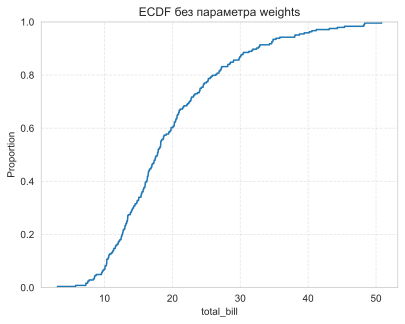

In [19]:
sns.ecdfplot(x='total_bill', data=tips)

plt.title('ECDF без параметра weights')
plt.grid(linestyle='--', alpha=0.5);

А теперь с параметром `weights`:

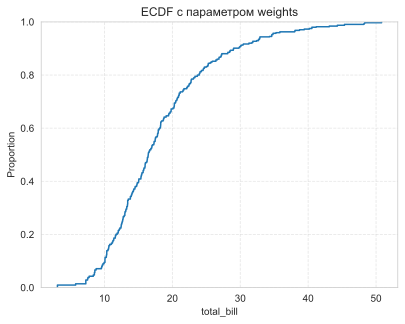

In [20]:
sns.ecdfplot(x='total_bill', data=tips,
             weights='weights')

plt.title('ECDF с параметром weights')
plt.grid(linestyle='--', alpha=0.5);

Как видим, распределение немного поменяло свою форму.